In [96]:
# Numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning
import tensorflow as tf
import keras
import sklearn
import sklearn.preprocessing, sklearn.base, sklearn.utils, sklearn.metrics

# Various Python tricks and libraries
import requests
import time
import functools
import operator
import collections
from tqdm import tqdm_notebook

# My own libraries
import function_zoo

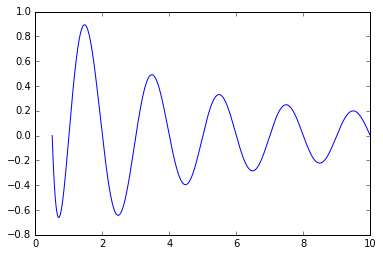

In [130]:
_r = np.mgrid[0.5:10:0.01].reshape(-1)
_y = np.sin(np.pi * _r) * (1 / _r**2 - 2 / _r)
plt.plot(_r, _y)

Epoch 1/1000
 - 8s - loss: 1.0058 - r2_score: -8.4067e-03
Epoch 2/1000
 - 0s - loss: 1.0028 - r2_score: -4.2261e-03
Epoch 3/1000
 - 0s - loss: 1.0038 - r2_score: -1.1131e-02
Epoch 4/1000
 - 0s - loss: 1.0032 - r2_score: -5.2163e-03
Epoch 5/1000
 - 0s - loss: 1.0027 - r2_score: -9.9557e-03
Epoch 6/1000
 - 0s - loss: 1.0020 - r2_score: -2.8850e-03
Epoch 7/1000
 - 0s - loss: 1.0029 - r2_score: -6.5352e-03
Epoch 8/1000
 - 0s - loss: 1.0020 - r2_score: -5.1725e-03
Epoch 9/1000
 - 0s - loss: 1.0011 - r2_score: -2.3663e-03
Epoch 10/1000
 - 0s - loss: 1.0007 - r2_score: -8.5079e-04
Epoch 11/1000
 - 0s - loss: 1.0004 - r2_score: -1.7765e-03
Epoch 12/1000
 - 0s - loss: 1.0001 - r2_score: -3.1472e-03
Epoch 13/1000
 - 0s - loss: 0.9999 - r2_score: -1.3513e-03
Epoch 14/1000
 - 0s - loss: 1.0000 - r2_score: -2.1968e-03
Epoch 15/1000
 - 0s - loss: 0.9998 - r2_score: -3.4348e-03
Epoch 16/1000
 - 0s - loss: 0.9995 - r2_score: -2.8063e-03
Epoch 17/1000
 - 0s - loss: 0.9992 - r2_score: 1.9070e-04
Epoch 1

Epoch 145/1000
 - 0s - loss: 0.9963 - r2_score: -3.0899e-03
Epoch 146/1000
 - 0s - loss: 0.9955 - r2_score: 0.0039
Epoch 147/1000
 - 0s - loss: 0.9960 - r2_score: -3.3236e-03
Epoch 148/1000
 - 0s - loss: 0.9957 - r2_score: 1.5355e-05
Epoch 149/1000
 - 0s - loss: 0.9953 - r2_score: 0.0034
Epoch 150/1000
 - 0s - loss: 0.9961 - r2_score: -2.9827e-03
Epoch 151/1000
 - 0s - loss: 0.9956 - r2_score: 6.7375e-04
Epoch 152/1000
 - 0s - loss: 0.9957 - r2_score: 0.0019
Epoch 153/1000
 - 0s - loss: 0.9955 - r2_score: 0.0033
Epoch 154/1000
 - 0s - loss: 0.9958 - r2_score: 9.4313e-04
Epoch 155/1000
 - 0s - loss: 0.9954 - r2_score: 0.0029
Epoch 156/1000
 - 0s - loss: 0.9952 - r2_score: -1.9509e-03
Epoch 157/1000
 - 0s - loss: 0.9972 - r2_score: -6.9739e-03
Epoch 158/1000
 - 0s - loss: 0.9965 - r2_score: 3.5101e-05
Epoch 159/1000
 - 0s - loss: 0.9954 - r2_score: 0.0038
Epoch 160/1000
 - 0s - loss: 0.9952 - r2_score: 0.0037
Epoch 161/1000
 - 0s - loss: 0.9953 - r2_score: -2.6215e-04
Epoch 162/1000
 - 0

 - 0s - loss: 0.9946 - r2_score: 0.0036
Epoch 291/1000
 - 0s - loss: 0.9946 - r2_score: 0.0036
Epoch 292/1000
 - 0s - loss: 0.9947 - r2_score: 3.2155e-05
Epoch 293/1000
 - 0s - loss: 0.9945 - r2_score: 0.0050
Epoch 294/1000
 - 0s - loss: 0.9953 - r2_score: -6.6270e-04
Epoch 295/1000
 - 0s - loss: 0.9949 - r2_score: 0.0044
Epoch 296/1000
 - 0s - loss: 0.9945 - r2_score: 0.0051
Epoch 297/1000
 - 0s - loss: 0.9945 - r2_score: 0.0038
Epoch 298/1000
 - 0s - loss: 0.9948 - r2_score: 0.0033
Epoch 299/1000
 - 0s - loss: 0.9948 - r2_score: 0.0021
Epoch 300/1000
 - 0s - loss: 0.9949 - r2_score: 0.0015
Epoch 301/1000
 - 0s - loss: 0.9951 - r2_score: -1.0028e-02
Epoch 302/1000
 - 0s - loss: 0.9957 - r2_score: -2.6382e-03
Epoch 303/1000
 - 0s - loss: 0.9951 - r2_score: 0.0015
Epoch 304/1000
 - 0s - loss: 0.9953 - r2_score: -8.4491e-03
Epoch 305/1000
 - 0s - loss: 0.9958 - r2_score: 0.0017
Epoch 306/1000
 - 0s - loss: 0.9946 - r2_score: 0.0049
Epoch 307/1000
 - 0s - loss: 0.9948 - r2_score: 0.0023
E

Epoch 437/1000
 - 0s - loss: 0.9937 - r2_score: 0.0047
Epoch 438/1000
 - 0s - loss: 0.9938 - r2_score: 0.0052
Epoch 439/1000
 - 0s - loss: 0.9938 - r2_score: 0.0050
Epoch 440/1000
 - 0s - loss: 0.9940 - r2_score: 0.0049
Epoch 441/1000
 - 0s - loss: 0.9935 - r2_score: 0.0045
Epoch 442/1000
 - 0s - loss: 0.9935 - r2_score: 0.0050
Epoch 443/1000
 - 0s - loss: 0.9940 - r2_score: 0.0030
Epoch 444/1000
 - 0s - loss: 0.9935 - r2_score: 0.0041
Epoch 445/1000
 - 0s - loss: 0.9936 - r2_score: 0.0020
Epoch 446/1000
 - 0s - loss: 0.9937 - r2_score: 0.0038
Epoch 447/1000
 - 0s - loss: 0.9938 - r2_score: 0.0044
Epoch 448/1000
 - 0s - loss: 0.9936 - r2_score: 0.0031
Epoch 449/1000
 - 0s - loss: 0.9951 - r2_score: -2.3199e-03
Epoch 450/1000
 - 0s - loss: 0.9938 - r2_score: -1.8341e-03
Epoch 451/1000
 - 0s - loss: 0.9937 - r2_score: 0.0054
Epoch 452/1000
 - 0s - loss: 0.9936 - r2_score: 0.0061
Epoch 453/1000
 - 0s - loss: 0.9936 - r2_score: 0.0035
Epoch 454/1000
 - 0s - loss: 0.9935 - r2_score: -2.4548

Epoch 584/1000
 - 0s - loss: 0.9934 - r2_score: -3.9503e-04
Epoch 585/1000
 - 0s - loss: 0.9924 - r2_score: 0.0059
Epoch 586/1000
 - 0s - loss: 0.9925 - r2_score: 0.0053
Epoch 587/1000
 - 0s - loss: 0.9923 - r2_score: 0.0050
Epoch 588/1000
 - 0s - loss: 0.9925 - r2_score: -2.2373e-04
Epoch 589/1000
 - 0s - loss: 0.9926 - r2_score: 0.0070
Epoch 590/1000
 - 0s - loss: 0.9926 - r2_score: 0.0046
Epoch 591/1000
 - 0s - loss: 0.9925 - r2_score: 0.0052
Epoch 592/1000
 - 0s - loss: 0.9924 - r2_score: 0.0032
Epoch 593/1000
 - 0s - loss: 0.9923 - r2_score: 0.0044
Epoch 594/1000
 - 0s - loss: 0.9927 - r2_score: -4.7640e-03
Epoch 595/1000
 - 0s - loss: 0.9923 - r2_score: 0.0045
Epoch 596/1000
 - 0s - loss: 0.9922 - r2_score: 0.0060
Epoch 597/1000
 - 0s - loss: 0.9920 - r2_score: 0.0056
Epoch 598/1000
 - 0s - loss: 0.9935 - r2_score: 0.0048
Epoch 599/1000
 - 0s - loss: 0.9932 - r2_score: 0.0042
Epoch 600/1000
 - 0s - loss: 0.9924 - r2_score: 0.0032
Epoch 601/1000
 - 0s - loss: 0.9921 - r2_score: 0.

Epoch 731/1000
 - 0s - loss: 0.9913 - r2_score: 0.0061
Epoch 732/1000
 - 0s - loss: 0.9910 - r2_score: 0.0087
Epoch 733/1000
 - 0s - loss: 0.9912 - r2_score: 0.0055
Epoch 734/1000
 - 0s - loss: 0.9910 - r2_score: 0.0030
Epoch 735/1000
 - 0s - loss: 0.9911 - r2_score: 0.0075
Epoch 736/1000
 - 0s - loss: 0.9914 - r2_score: 0.0037
Epoch 737/1000
 - 0s - loss: 0.9917 - r2_score: 0.0018
Epoch 738/1000
 - 0s - loss: 0.9911 - r2_score: 0.0012
Epoch 739/1000
 - 0s - loss: 0.9929 - r2_score: 0.0047
Epoch 740/1000
 - 0s - loss: 0.9906 - r2_score: 0.0091
Epoch 741/1000
 - 0s - loss: 0.9910 - r2_score: 0.0051
Epoch 742/1000
 - 0s - loss: 0.9920 - r2_score: 0.0020
Epoch 743/1000
 - 0s - loss: 0.9909 - r2_score: 0.0087
Epoch 744/1000
 - 0s - loss: 0.9906 - r2_score: 0.0088
Epoch 745/1000
 - 0s - loss: 0.9931 - r2_score: 0.0012
Epoch 746/1000
 - 0s - loss: 0.9913 - r2_score: 0.0046
Epoch 747/1000
 - 0s - loss: 0.9915 - r2_score: 0.0064
Epoch 748/1000
 - 0s - loss: 0.9914 - r2_score: 0.0084
Epoch 749/

Epoch 879/1000
 - 0s - loss: 0.9897 - r2_score: 0.0100
Epoch 880/1000
 - 0s - loss: 0.9898 - r2_score: 0.0104
Epoch 881/1000
 - 0s - loss: 0.9901 - r2_score: 0.0053
Epoch 882/1000
 - 0s - loss: 0.9897 - r2_score: 0.0066
Epoch 883/1000
 - 0s - loss: 0.9913 - r2_score: 0.0026
Epoch 884/1000
 - 0s - loss: 0.9906 - r2_score: -3.7070e-03
Epoch 885/1000
 - 0s - loss: 0.9903 - r2_score: 0.0088
Epoch 886/1000
 - 0s - loss: 0.9899 - r2_score: 0.0064
Epoch 887/1000
 - 0s - loss: 0.9907 - r2_score: 0.0035
Epoch 888/1000
 - 0s - loss: 0.9895 - r2_score: 0.0069
Epoch 889/1000
 - 0s - loss: 0.9906 - r2_score: 0.0044
Epoch 890/1000
 - 0s - loss: 0.9904 - r2_score: 0.0063
Epoch 891/1000
 - 0s - loss: 0.9908 - r2_score: 0.0067
Epoch 892/1000
 - 0s - loss: 0.9910 - r2_score: 0.0015
Epoch 893/1000
 - 0s - loss: 0.9911 - r2_score: 0.0047
Epoch 894/1000
 - 0s - loss: 0.9903 - r2_score: 0.0036
Epoch 895/1000
 - 0s - loss: 0.9896 - r2_score: 0.0090
Epoch 896/1000
 - 0s - loss: 0.9897 - r2_score: 0.0037
Epoch

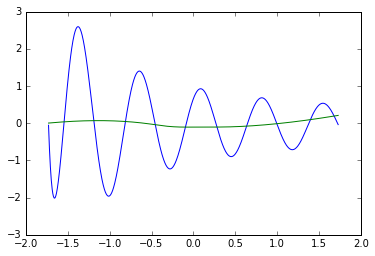

In [136]:
_r_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(_r.reshape(-1,1))
_y_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(_y.reshape(-1,1))

G = keras.models.Sequential([
    keras.layers.Dense(units=15, activation="elu", input_shape=(1,)),
    keras.layers.Dense(units=30, activation="elu"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers, metrics=[r2_score])
history = G.fit(
    x=_r_scaled_shaped, 
    y=_y_scaled_shaped, 
    epochs=1000, batch_size=256, shuffle=True, verbose=2
)
_yhat = G.predict(x=_r_scaled_shaped).reshape(-1)
plt.plot(_r_scaled_shaped, _y_scaled_shaped, _r_scaled_shaped, _yhat)

## Trash

In [ ]:
# Get the data
_X = np.mgrid[-10:10.1:0.5, -10:10.1:0.5, -10:10.1:0.5].reshape(3, -1).T
_r = np.linalg.norm(_X, axis=-1)
_y = np.sin(np.pi * _r) * (1 / _r**2 - 2 / _r)

_X = _X[np.where(_r > 0.5)]
_y = _y[np.where(_r > 0.5)]

In [118]:
def r2_score(ytrue, ypred): # sklearn.metrics.r2_score in tensorflow. 1 output only. 

    ytrue_mean = tf.reduce_mean(ytrue, name="ytrue_mean")
    r2_score = tf.subtract(1., tf.truediv(tf.reduce_mean((ytrue - ypred) ** 2), tf.reduce_mean((ytrue - ytrue_mean) ** 2)), name="r2_score")
    return r2_score

In [ ]:
# Train
LOSS = pd.DataFrame([], columns=("loss",))
RAW = []

for ns in tqdm_notebook(np.int32(np.mgrid[0:10, 0:10, 0:10]).reshape(3, -1).T):
    
    ns_minimal_form = [n for n in ns if n!=0]
    ns_normal_form = ns_minimal_form + [0] * (3 - len(ns_minimal_form))
    n1, n2, n3 = ns
    if ns_normal_form in function_zoo.to_iterable(LOSS.index) or 3*n1+n1*n2+n2*n3+n3>500 or 3*n1+n1*n2+n2*n3+n3<100:
        continue
    
    G = keras.models.Sequential([keras.layers.InputLayer(input_shape=(3,))])
    for n in ns_minimal_form:
        G.add(keras.layers.Dense(units=n, activation="elu"))
    G.add(keras.layers.Dense(units=1, activation=None))
    G.compile(loss='mse', optimizer='adam')
    
    history = G.fit(x=_X, y=_y, epochs=30, batch_size=256, validation_split=0.25, shuffle=True, verbose=0)
    RAW.append([n1, n2, n3, history.history['val_loss'][-1]])